This notebook provides a data-driven analysis of PM2.5 air pollution exposure and its potential health impacts 
*******Key Analyses Performed***************
#### 1. Basic Data Exploration

* Total number of administrative (GADM Level 2) regions in India.
* Identification of the most polluted district (GADM2) for the years 1998, 2005, and 2021 globally.

#### 2. Population-Weighted PM2.5 Concentrations

* Computed population-weighted PM2.5 for each country globally (1998–2021).
* Computed the population-weighted PM2.5 trend for Uttar Pradesh (UP) from 1998 to 2021.
* Visualized the PM2.5 trend for UP using a line plot (saved as a high-res PNG).
* The country-level population-weighted PM2.5 values are saved in CSV format for external use or reporting.

#### 3. Identifies the top 10 most polluted countries in 2021 based on population-weighted PM2.5 levels.
* Generates a bar chart showing life years lost in these top 10 countries.
* Highlighted the top polluted countries on the global map

#### 4. Calculates life years lost (LLPP) per country in the comparison of western and easyern Europe.

#### 5. Average Pm2.5 across globe.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("E:/ESG_Material/Udo/selected/gadm2_aqli_1998_2021.csv")
global_shp = gpd.read_file("E:/ESG_Material/Udo/gadm2_aqli_shapefile/aqli_gadm2_final_june302023.shp")

In [3]:

india_data = data[data["country"] == "India"] # Filtering India


num_gadm2_india = india_data["name_2"].nunique() #nuinque- count of unique
print(f"Number of GADM2 regions in India: {num_gadm2_india}")

Number of GADM2 regions in India: 684


#### Population-Weighted PM2.5 Concentrations

In [3]:
pm_columns = [col for col in data.columns if col.startswith("pm")]

# Country_weighted
def country_weighted(df):
    results = data.groupby("country").apply(
        lambda group: pd.Series({
            year: (group[year] * group["population"]).sum() / group["population"].sum() 
            for year in pm_columns # year is single value from pm_columns multiplied by population under each row.
        })
    ).reset_index()
    return results

country_weighted = country_weighted(data)

country_weighted.to_csv("E:/ESG_Material/Udo/Output/country_weighted.csv", index=False)

C:\Users\Atique\AppData\Local\Temp\ipykernel_368\4167687267.py:7: RuntimeWarning: invalid value encountered in scalar divide
  year: (group[year] * group["population"]).sum() / group["population"].sum()


In [5]:
Top10 = country_weighted[["country", "pm2021"]].sort_values(by="pm2021", ascending=False).head(10)

print(Top10) # Bangladesh 73.957984, India 58.701530

                              country     pm2021
17                         Bangladesh  73.957984
100                             India  58.701530
151                             Nepal  51.713215
165                          Pakistan  44.732405
142                          Mongolia  36.039302
147                           Myanmar  34.979832
59   Democratic Republic of the Congo  34.643665
179             Republic of the Congo  32.409004
182                            Rwanda  32.356333
36                            Burundi  31.912485


In [7]:
years = ["pm1998", "pm2005", "pm2021"]

for year in years:
    max_row = data.loc[data[year].idxmax()]
    print(f"\nMost polluted GADM2 region in {year[-4:]}:")
    print(f"Country: {max_row['country']}, State: {max_row['name_1']}, District: {max_row['name_2']}, PM2.5: {max_row[year]:.2f} µg/m³")


Most polluted GADM2 region in 1998:
Country: India, State: Uttar Pradesh, District: Unnao, PM2.5: 78.55 µg/m³

Most polluted GADM2 region in 2005:
Country: India, State: NCT of Delhi, District: NCT of Delhi, PM2.5: 98.75 µg/m³

Most polluted GADM2 region in 2021:
Country: India, State: NCT of Delhi, District: NCT of Delhi, PM2.5: 126.51 µg/m³


In [9]:
import matplotlib.pyplot as plt


up_data = data[data["name_1"] == "Uttar Pradesh"] #Filtering UP

# weighted average PM2.5 
yearly_up_data = {
    year: (up_data[year] * up_data["population"]).sum() / up_data["population"].sum()
    for year in pm_columns
}

In [11]:
trend_data = pd.DataFrame({
    "year": [int(col[-4:]) for col in pm_columns],# taking last 4 characters , pm1998-->1998 and saving it as int.
    "pm25": [yearly_up_data[year] for year in pm_columns]
})
# I created above dataframe, as we have dictionary (yearly_up_data) where we cannot plot in clear and easy way.

Trendline plot saved as 'UP_pm25_trend.png'


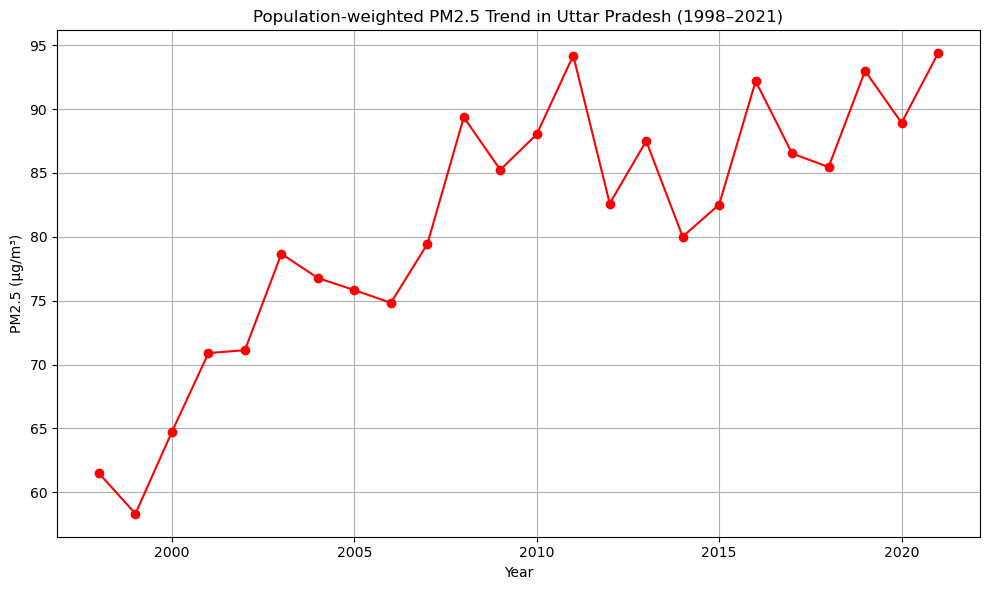

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(trend_data["year"], trend_data["pm25"], marker="o", linestyle='-', color="red")
plt.title("Population-weighted PM2.5 Trend in Uttar Pradesh (1998–2021)")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.grid(True)
plt.tight_layout()


plt.savefig("E:/ESG_Material/Udo/Output/UP_pm25_trend.png", dpi=300)
print("Trendline plot saved as 'UP_pm25_trend.png'")

In [15]:

llpp_data = data.groupby("country")[["llpp_who_2021", "population"]].apply(
    lambda df: pd.Series({
        "llpp_who_2021": (df["llpp_who_2021"] * df["population"]).sum() / df["population"].sum()
    })
).reset_index()

Top10_llpp = Top10.merge(llpp_data, on="country")

C:\Users\Atique\AppData\Local\Temp\ipykernel_368\1128091138.py:3: RuntimeWarning: invalid value encountered in scalar divide
  "llpp_who_2021": (df["llpp_who_2021"] * df["population"]).sum() / df["population"].sum()


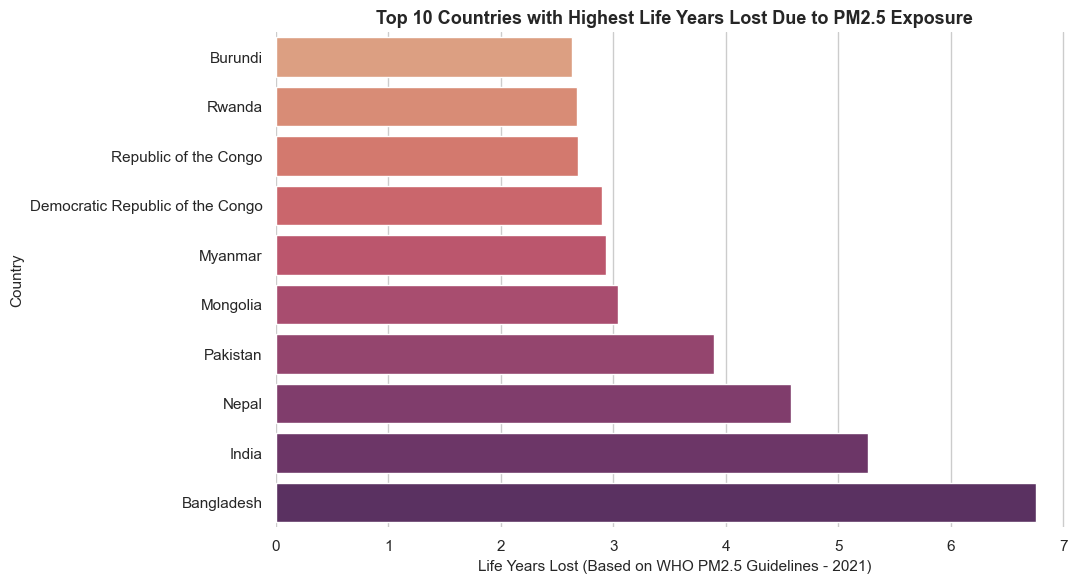

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a different Seaborn style for a fresh look
sns.set_theme(style="whitegrid")

# Create a color-blind friendly palette
colors = sns.color_palette("flare", len(Top10_llpp))

# Initialize the plot
fig, ax = plt.subplots(figsize=(11, 6))

# Create a horizontal bar plot
sns.barplot(
    data=Top10_llpp.sort_values("llpp_who_2021", ascending=True),
    y="country", x="llpp_who_2021",
    palette=colors,
    ax=ax
)

# Set axis labels and title
ax.set_xlabel("Life Years Lost (Based on WHO PM2.5 Guidelines - 2021)", fontsize=11)
ax.set_ylabel("Country", fontsize=11)
ax.set_title("Top 10 Countries with Highest Life Years Lost Due to PM2.5 Exposure", fontsize=13, weight='bold')

# Adjust layout and remove spines for a cleaner look
sns.despine(left=True, bottom=True)
plt.tight_layout()

# Save the plot
output_path = "E:/ESG_Material/Udo/Output/LifeYearsLost_Top10_PM25_WHO2021.png"
plt.savefig(output_path, dpi=300)
plt.show()

In [19]:
global_shp = global_shp.rename(columns={"obidgadm2": "objectid_gadm2"})

# Merge
merged = global_shp.merge(data, on="objectid_gadm2")

In [12]:
print(data.shape)

print(global_shp.shape)

print(merged.shape)

print(Top10.shape)

(48155, 80)
(48155, 5)
(48155, 84)
(10, 2)


In [8]:
pm_columns = [col for col in data.columns if col.startswith("pm")]

# Country_weighted
def country_weighted(df):
    results = data.groupby("country").apply(
        lambda group: pd.Series({
            year: (group[year] * group["population"]).sum() / group["population"].sum() 
            for year in pm_columns # year is single value from pm_columns multiplied by population under each row.
        })
    ).reset_index()
    return results

country_weighted = country_weighted(data)

country_weighted.to_csv("E:/ESG_Material/Udo/Out/country_weighted.csv", index=False)


Top10 = country_weighted[["country", "pm2021"]].sort_values(by="pm2021", ascending=False).head(10)



global_shp = global_shp.rename(columns={"obidgadm2": "objectid_gadm2"})

# Merge
merged = global_shp.merge(data, on="objectid_gadm2")

C:\Users\Atique\AppData\Local\Temp\ipykernel_3980\2959218199.py:7: RuntimeWarning: invalid value encountered in scalar divide
  year: (group[year] * group["population"]).sum() / group["population"].sum()


In [14]:
merged = merged[merged.geometry.notnull()]

In [16]:
top10_list = Top10["country"].tolist()
merged["highlight"] = merged["country"].apply(lambda x: "Top 10" if x in top10_list else "Others")

print(merged.shape)

(48155, 85)


In [18]:
country_level = merged.dissolve(by=["country", "highlight"], as_index=False)

In [19]:
country_level = country_level[country_level.geometry.is_valid & country_level.geometry.notnull()]

In [20]:
country_level[country_level["highlight"] == "Top 10"]

,country,highlight,geometry,objectid_gadm2,name0,name1,name2,iso_alpha3,name_1,name_2,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
17,Bangladesh,Top 10,"MULTIPOLYGON (((89.23486 21.69387, 89.23543 21...",3388,Bangladesh,Barisal,Barguna,BGD,Barisal,Barguna,...,4.24,4.04,4.58,4.13,4.72,4.01,4.92,4.26,4.75,4.72
36,Burundi,Top 10,"POLYGON ((29.36865 -4.11937, 29.36776 -4.10003...",9981,Burundi,Bubanza,Bubanza,BDI,Bubanza,Bubanza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Democratic Republic of the Congo,Top 10,"MULTIPOLYGON (((17.83268 -8.08944, 17.82524 -8...",13300,Democratic Republic of the Congo,Bas-Uele,Aketi,COD,Bas-Uele,Aketi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,India,Top 10,"MULTIPOLYGON (((69.72347 21.56069, 69.72347 21...",17298,India,Andaman and Nicobar,Nicobar Islands,IND,Andaman and Nicobar,Nicobar Islands,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
142,Mongolia,Top 10,"POLYGON ((94.41412 44.51233, 94.41403 44.51233...",25153,Mongolia,Arhangay,Battsengel,MNG,Arhangay,Battsengel,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
147,Myanmar,Top 10,"MULTIPOLYGON (((93.37341 14.15151, 93.37353 14...",25687,Myanmar,Ayeyarwady,Hinthada,MMR,Ayeyarwady,Hinthada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,Nepal,Top 10,"POLYGON ((85.32607 26.74475, 85.32515 26.74513...",25888,Nepal,Bagmati,Bhaktapur,NPL,Bagmati,Bhaktapur,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,Pakistan,Top 10,"MULTIPOLYGON (((67.29894 24.55476, 67.30287 24...",28145,Pakistan,Azad Kashmir,Bagh,PAK,Azad Kashmir,Bagh,...,1.24,1.16,1.10,1.24,1.88,1.49,1.31,1.08,1.22,1.44
179,Republic of the Congo,Top 10,"MULTIPOLYGON (((11.8618 -4.83014, 11.8618 -4.8...",31338,Republic of the Congo,Bouenza,Boko-Songho,COG,Bouenza,Boko-Songho,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,Rwanda,Top 10,"POLYGON ((29.52466 -2.82986, 29.52444 -2.82994...",36794,Rwanda,Amajyaruguru,Burera,RWA,Amajyaruguru,Burera,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


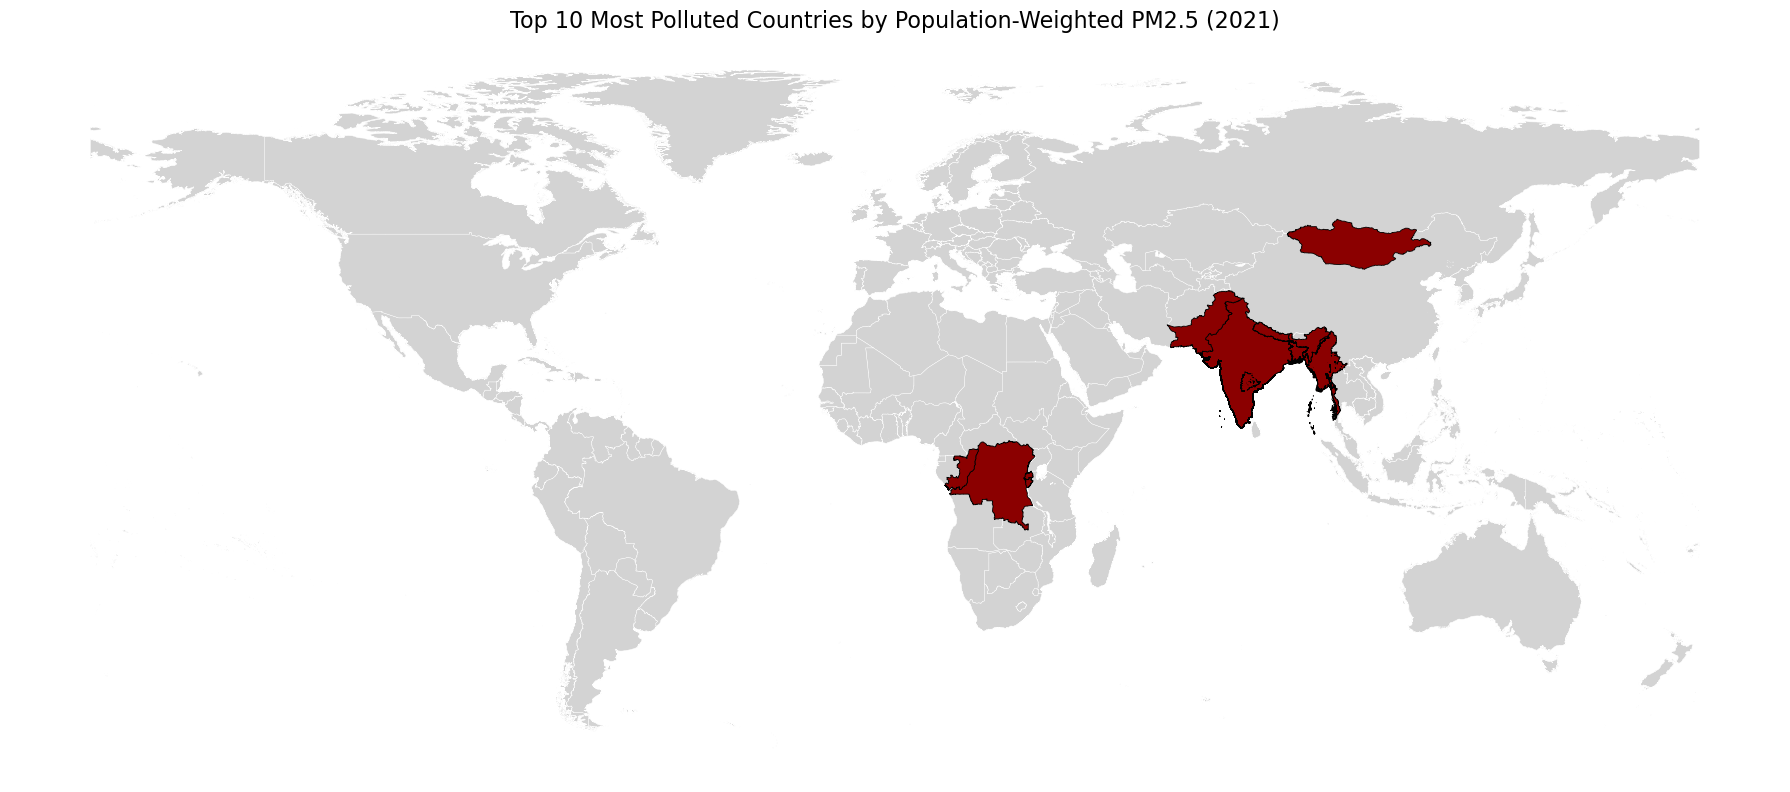

In [21]:
# Plot
fig, ax = plt.subplots(figsize=(18, 10))

# Others (gray)
country_level[country_level["highlight"] == "Others"].plot(
    ax=ax, color="lightgray", edgecolor="white", linewidth=0.3
)

# Top 10 (dark red)
country_level[country_level["highlight"] == "Top 10"].plot(
    ax=ax, color="darkred", edgecolor="black", linewidth=0.6
)

ax.set_title("Top 10 Most Polluted Countries by Population-Weighted PM2.5 (2021)", fontsize=16)
ax.axis("off")

plt.tight_layout()
plt.savefig("E:/ESG_Material/Udo/Output/top10_polluted_countries_map_gadm.png", dpi=300, bbox_inches="tight")
plt.show()

#### Average Pm2.5 across globe.

In [28]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

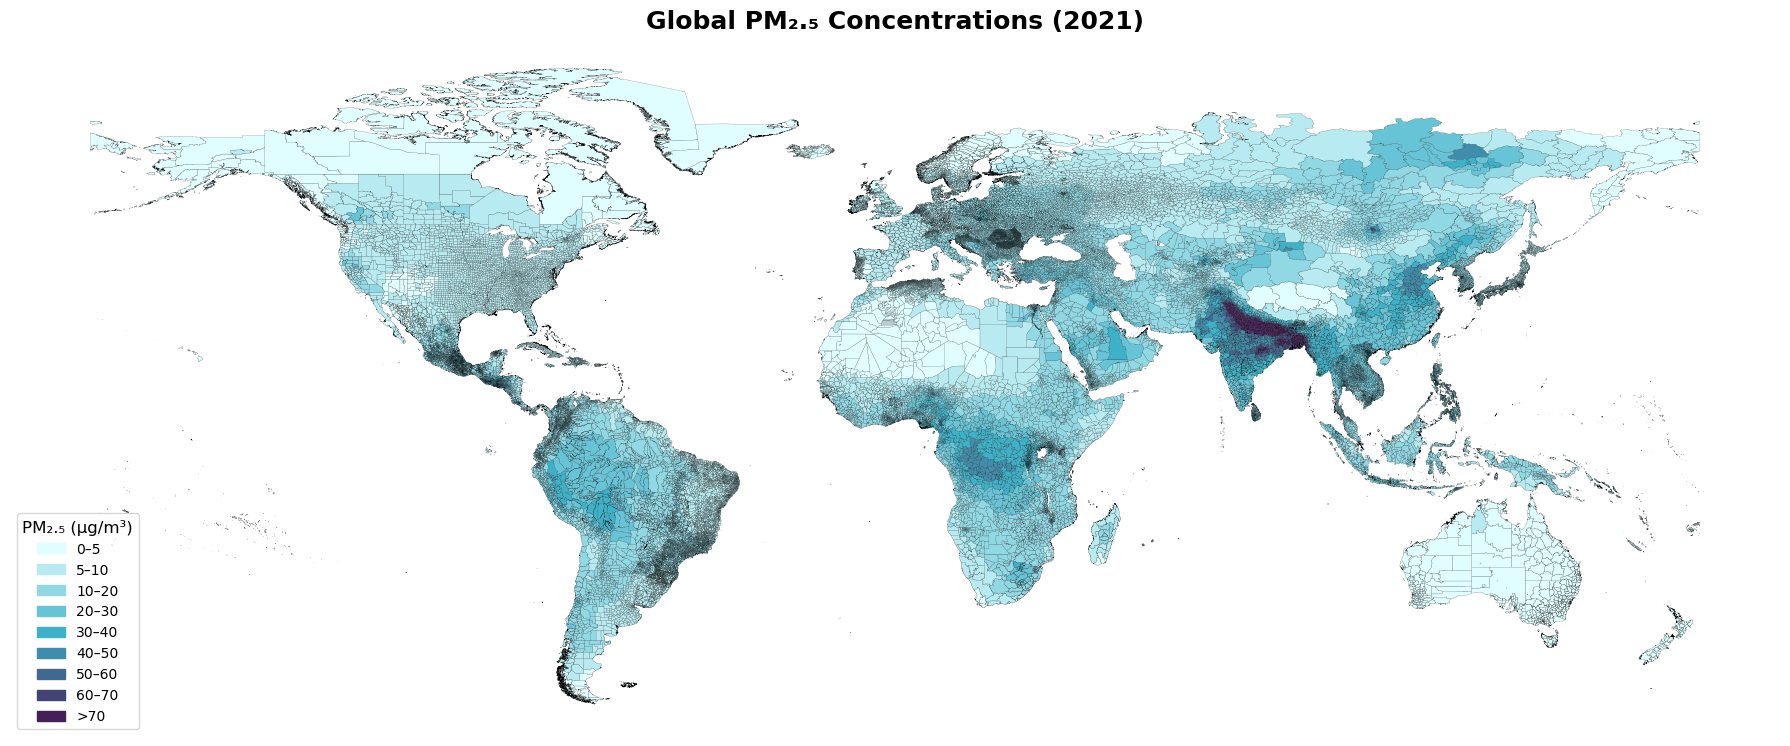

In [30]:
pm_bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, float("inf")]
pm_colors = [
    "#e0feff",  # 0–5
    "#b7ebf1",  # 5–10
    "#8fd8e4",  # 10–20
    "#66c4d6",  # 20–30
    "#3db1c8",  # 30–40
    "#3f8dac",  # 40–50
    "#416891",  # 50–60
    "#434475",  # 60–70
    "#451f59",  # >70
]

cmap = ListedColormap(pm_colors)
norm = BoundaryNorm(pm_bins, len(pm_colors))


fig, ax = plt.subplots(figsize=(18, 10))
merged.plot(
    column="pm2021",
    cmap=cmap,
    norm=norm,
    linewidth=0.1,
    edgecolor="black",
    ax=ax
)

ax.set_title("Global PM₂.₅ Concentrations (2021)", fontsize=18, weight='bold')
ax.axis("off")


legend_labels = ["0–5", "5–10", "10–20", "20–30", "30–40", "40–50", "50–60", "60–70", ">70"]
handles = [mpatches.Patch(color=pm_colors[i], label=legend_labels[i]) for i in range(len(pm_colors))]

plt.legend(
    handles=handles,
    title="PM₂.₅ (µg/m³)",
    loc='lower left',
    frameon=True,
    fontsize=10,
    title_fontsize=12
)


plt.tight_layout()
plt.savefig("E:/ESG_Material/Udo/Output/Global_pm2.5.svg", format="svg", dpi=320)
plt.show()

#### Life years lost (LLPP)

In [34]:
import matplotlib.patheffects as PathEffects

C:\Users\Atique\AppData\Local\Temp\ipykernel_3980\2400272066.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = country_geom.centroid.iloc[0]
C:\Users\Atique\AppData\Local\Temp\ipykernel_3980\2400272066.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = country_geom.centroid.iloc[0]
C:\Users\Atique\AppData\Local\Temp\ipykernel_3980\2400272066.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = country_geom.centroid.iloc[0]


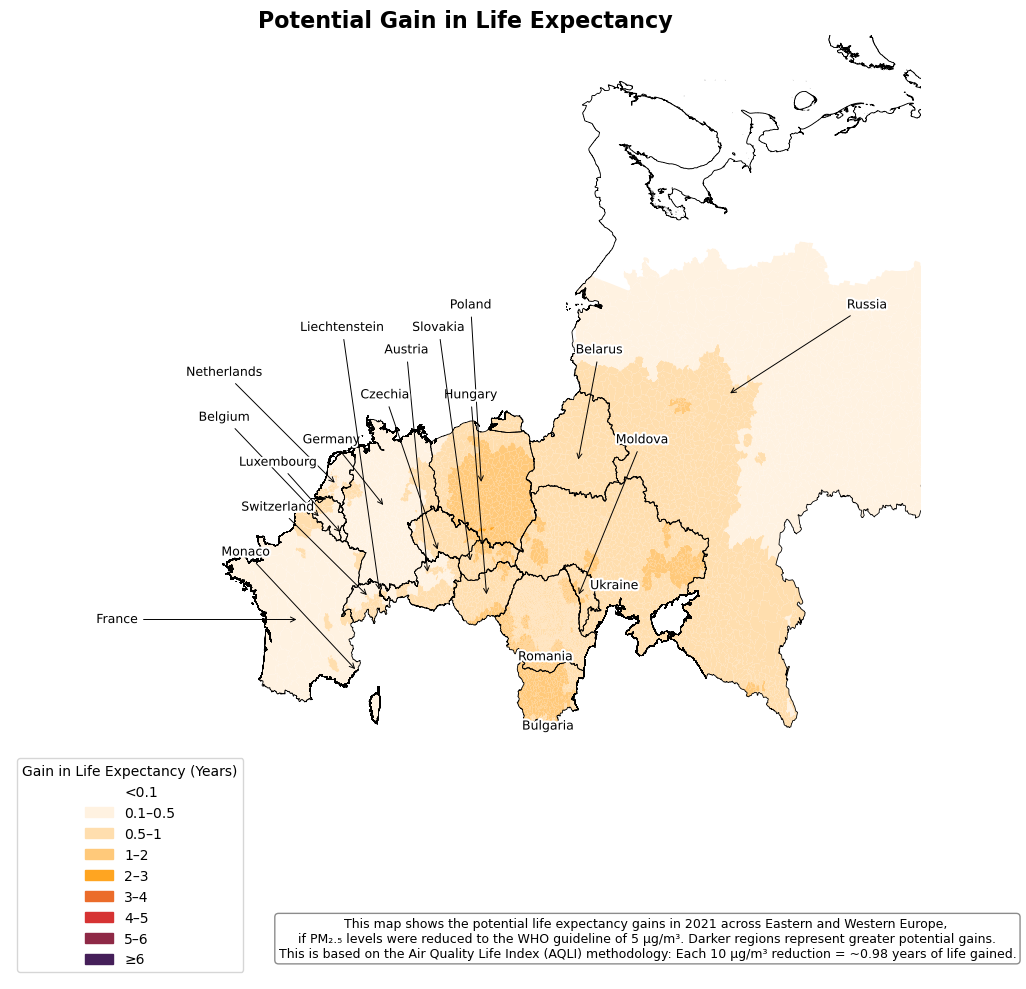

In [38]:
# --------- Gain in life expectancy-------------------------
merged["gain_le_2021"] = merged.apply(
    lambda row: max(0, (row["pm2021"] - 5) * 0.098), axis=1
)

#-------------------
bins = [0.0, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, float("inf")]
hex_colors = [
    "#ffffff", "#fff2e1", "#ffdeae", "#ffc97a", "#ffa521",
    "#eb6c2a", "#d63333", "#8e2946", "#451f59"
]
cmap = ListedColormap(hex_colors)
norm = BoundaryNorm(bins, len(hex_colors))


eastern = [
    "Belarus", "Bulgaria", "Czechia", "Hungary", "Poland",
    "Moldova", "Romania", "Russia", "Slovakia", "Ukraine"
]
western = [
    "Austria", "Belgium", "France", "Germany", "Liechtenstein",
    "Luxembourg", "Monaco", "Netherlands", "Switzerland"
]
selected_europe = eastern + western

# Filter merged dataset
europe_data = merged[merged["name0"].isin(selected_europe)].copy()
europe_data = europe_data[europe_data.geometry.notnull()]


country_borders = europe_data.dissolve(by="name0", as_index=False) # Dissolve to get country boundaries


fig, ax = plt.subplots(figsize=(14, 10))

# Plot color layer (no GADM2 borders)
europe_data.plot(
    column="gain_le_2021",
    cmap=cmap,
    norm=norm,
    linewidth=0,
    ax=ax
)


country_borders.boundary.plot(ax=ax, color="black", linewidth=0.6) # only country borders


ax.set_xlim(-25, 60) # Bounding box
ax.set_ylim(30, 72)


ax.set_title("Potential Gain in Life Expectancy", fontsize=16, weight='bold')
ax.axis("off")


legend_labels = ["<0.1", "0.1–0.5", "0.5–1", "1–2", "2–3", "3–4", "4–5", "5–6", "≥6"]
handles = [mpatches.Patch(color=hex_colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=handles, title="Gain in Life Expectancy (Years)", loc='lower left', frameon=True)

# External country labels (excluding 3 inside labels)
label_positions = {
    "France": (-15, 46, 2, 46),
    "Germany": (5, 54, 10, 51),
    "Austria": (12, 58, 14, 48),
    "Poland": (18, 60, 19, 52),
    "Czechia": (10, 56, 15, 49),
    "Hungary": (18, 56, 19.5, 47),
    "Russia": (55, 60, 42, 56),
    "Belarus": (30, 58, 28, 53),
    "Slovakia": (15, 59, 18, 48.5),
    "Moldova": (34, 54, 28, 47),
    "Belgium": (-5, 55, 4, 50.5),
    "Netherlands": (-5, 57, 5.5, 52),
    "Switzerland": (0, 51, 8.5, 47),
    "Luxembourg": (0, 53, 6, 49.8),
    "Liechtenstein": (6, 59, 9.5, 47.2),
    "Monaco": (-3, 49, 7.4, 43.7)
}

# external labels
for country, (x_text, y_text, x_arrow, y_arrow) in label_positions.items():
    ax.annotate(
        country,
        xy=(x_arrow, y_arrow),
        xytext=(x_text, y_text),
        textcoords="data",
        arrowprops=dict(arrowstyle="->", color='black', linewidth=0.7),
        fontsize=9,
        ha='center',
        va='center',
        path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")]
    )

#  internal labels (centered below geometry)
for name in ["Bulgaria", "Romania", "Ukraine"]:
    country_geom = country_borders[country_borders["name0"] == name].geometry
    if not country_geom.empty:
        centroid = country_geom.centroid.iloc[0]
        ax.text(
            centroid.x,
            centroid.y - 1.5,  # Slightly below the center
            name,
            fontsize=9,
            ha='center',
            va='center',
            path_effects=[PathEffects.withStroke(linewidth=3, foreground="white")]
        )


textstr = (
    "This map shows the potential life expectancy gains in 2021 across Eastern and Western Europe, \n"
    "if PM₂.₅ levels were reduced to the WHO guideline of 5 µg/m³. Darker regions represent greater potential gains.\n"
    "This is based on the Air Quality Life Index (AQLI) methodology: Each 10 µg/m³ reduction = ~0.98 years of life gained."
)



ax.text(
    0.7, 0.02, textstr,
    transform=ax.transAxes,
    fontsize=9,
    ha="center",
    va="bottom",
    bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray", alpha=0.9),
    wrap=True
)

plt.tight_layout()
plt.savefig("E:/ESG_Material/Udo/Output/Potential_gain_eastern_western_europe.pdf", format="pdf", dpi=300)
plt.show()